In [1]:
import time
start1 = time.time()
print ("Importing packages")
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split as tts, GridSearchCV, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
from scipy import stats
def standard_err(y_true,y_pred):
    gradient, intercept, r_value, p_value, std_err = stats.linregress(y_true,y_pred)
    return std_err
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, LassoCV, ElasticNetCV
import matplotlib.pyplot as plt
import seaborn as sns



model = "Linear Regression"
print ("Running model ", model)
print("Reading in the dataset and stored as df, Keeping a copy of original df as df_original")
time.sleep(1)
df = pd.read_csv("gapminder (1).csv")
df_original = df.copy()
print("Because this involves working with distance based ML algorithms, we will scale/normalize numerical variables and one hot encode categorical variables")
time.sleep(1)
scaler = StandardScaler()
print ("Scaling numerical columns only")
time.sleep(1)
num = pd.DataFrame(scaler.fit_transform(df.iloc[:,:-1]), columns=list(df.iloc[:,:-1]))
print ("rejoining scaled to region column")
time.sleep(1)
df = pd.concat([num, pd.DataFrame(df["Region"])],1)
print ("one hot encoding region column")
time.sleep(1)
df = pd.get_dummies(df)
print ("dropping one of the categorical columns")
time.sleep(1)
df.drop(["Region_South Asia"],1,inplace = True)
print ("defining X and y")
time.sleep(1)
X = df.drop(["life"],1)
y = df["life"]
print ("importing Linear regression - default intialization")
time.sleep(1)
lin_reg  = LinearRegression()
print ("Manual train test split")
time.sleep(1)
X_train, X_test, y_train, y_test = tts(X,y,random_state = 42, test_size = 0.25)
print ("first run of manual split and ", model)
time.sleep(1)
lin_reg.fit(X_train,y_train)
y_pred = lin_reg.predict(X_test)
print ("R squared "+str(model)+" "+str(r2_score(y_test,y_pred)))
print ("RMSE squared "+str(model)+" "+str(np.sqrt(mean_squared_error(y_test,y_pred))))
print ("Standard error "+str(model)+" "+str(standard_err(y_test,y_pred)))
print ("There are no hyperparameters to control in Linear Regression. That comes with regularization. Seeing the features the line without any feature selection has taken")
time.sleep(5)
features = list(X)
feature_weights = np.abs(lin_reg.coef_).tolist()
d = dict(zip(features, feature_weights))
d = pd.DataFrame(list(d.items()), columns=["features", "ranking"])
d = d.sort_values(["ranking"], ascending=False)
print ("Top 5 features chosen by linear regression are:")
time.sleep(3)
f1 = d[:5]["features"].tolist()
print ("\n")
print (f1)
time.sleep(2)



print ("Plotting Feature importances")
time.sleep(3)
d.index = d["features"]
d.drop(["features"],1,inplace = True)
plt.figure(figsize=(21,16))
ax = d.plot.barh()
ax.invert_yaxis()
plt.show()
m = time.time() - start1
m = m/60
m = str(round(m,3))
print ("Run time in mins "+m)

print ("These were the model accuracies with all features")
time.sleep(5)
print ("R squared "+str(model)+" "+str(r2_score(y_test,y_pred)))
print ("RMSE squared "+str(model)+" "+str(np.sqrt(mean_squared_error(y_test,y_pred))))
print ("Standard error "+str(model)+" "+str(standard_err(y_test,y_pred)))

print ("Essentially since the top 5 features were selected as ")
print ("\n)")
print (f1)
print ("\n")
print ("If we keep just these features above, the R - Squared and the other accuracy metrics will "
       +" decrease, however very marginally, as the most important features are still being taken in the model")
time.sleep(7)
print (f1)
print ("Keeping just these columns as X")
X = X[f1]
y = df["life"]
print ("importing Linear regression - default intialization")
time.sleep(1)
lin_reg  = LinearRegression()
print ("Manual train test split")
time.sleep(1)
X_train, X_test, y_train, y_test = tts(X,y,random_state = 42, test_size = 0.25)
print ("first run of manual split and ", model)
time.sleep(1)
lin_reg.fit(X_train,y_train)
y_pred = lin_reg.predict(X_test)
print ("R squared "+str(model)+" "+str(r2_score(y_test,y_pred)))
print ("RMSE squared "+str(model)+" "+str(np.sqrt(mean_squared_error(y_test,y_pred))))
print ("Standard error "+str(model)+" "+str(standard_err(y_test,y_pred)))
print ("As predicted the R squared has come down by just 0.04 even though we removed 9 columns or features"
       +", which proves that the 5 features are actually the ones the line has deemed as important and the"
      +" rest aren't that important in determining the y column or life")

Importing packages
Running model  Linear Regression
Reading in the dataset and stored as df, Keeping a copy of original df as df_original
Because this involves working with distance based ML algorithms, we will scale/normalize numerical variables and one hot encode categorical variables
Scaling numerical columns only


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


rejoining scaled to region column
one hot encoding region column
dropping one of the categorical columns
defining X and y
importing Linear regression - default intialization
Manual train test split
first run of manual split and  Linear Regression
R squared Linear Regression 0.805563042172316
RMSE squared Linear Regression 0.38679108039834453
Standard error Linear Regression 0.07601052225954803
There are no hyperparameters to control in Linear Regression. That comes with regularization. Seeing the features the line without any feature selection has taken
Top 5 features chosen by linear regression are:


['child_mortality', 'HIV', 'Region_East Asia & Pacific', 'GDP', 'Region_Middle East & North Africa']
Plotting Feature importances


<Figure size 2100x1600 with 0 Axes>

<Figure size 640x480 with 1 Axes>

Run time in mins 0.493
These were the model accuracies with all features
R squared Linear Regression 0.805563042172316
RMSE squared Linear Regression 0.38679108039834453
Standard error Linear Regression 0.07601052225954803
Essentially since the top 5 features were selected as 

)
['child_mortality', 'HIV', 'Region_East Asia & Pacific', 'GDP', 'Region_Middle East & North Africa']


If we keep just these features above, the R - Squared and the other accuracy metrics will  decrease, however very marginally, as the most important features are still being taken in the model
['child_mortality', 'HIV', 'Region_East Asia & Pacific', 'GDP', 'Region_Middle East & North Africa']
Keeping just these columns as X
importing Linear regression - default intialization
Manual train test split
first run of manual split and  Linear Regression
R squared Linear Regression 0.7625860624974314
RMSE squared Linear Regression 0.4274055400038436
Standard error Linear Regression 0.08408021869196773
As predicted the

In [2]:
print ("Storing the most important 5 features of the model as f1")
print ("Resetting Dataframe")
df.head()
print ("Removing the Region column as we want to use the filter"
       + " method of Pearson Correlation which works only with numerical variables")


Storing the most important 5 features of the model as f1
Resetting Dataframe
Removing the Region column as we want to use the filter method of Pearson Correlation which works only with numerical variables


In [3]:
print ("Feature selection - Filter method")
time.sleep(3)
print ("Dropping the Region column because the filter method will work only with numerical variables")
df = df_original.drop(["Region"],1)

Feature selection - Filter method
Dropping the Region column because the filter method will work only with numerical variables


In [4]:
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
0,34811059,2.73,0.1,3.328945,24.59620,12314,129.9049,75.3,29.5
1,19842251,6.43,2.0,1.474353,22.25083,7103,130.1247,58.3,192.0
2,40381860,2.24,0.5,4.785170,27.50170,14646,118.8915,75.5,15.4
3,2975029,1.40,0.1,1.804106,25.35542,7383,132.8108,72.5,20.0
4,21370348,1.96,0.1,18.016313,27.56373,41312,117.3755,81.5,5.2


Life is our output and everything else is the X
Printing correlation table


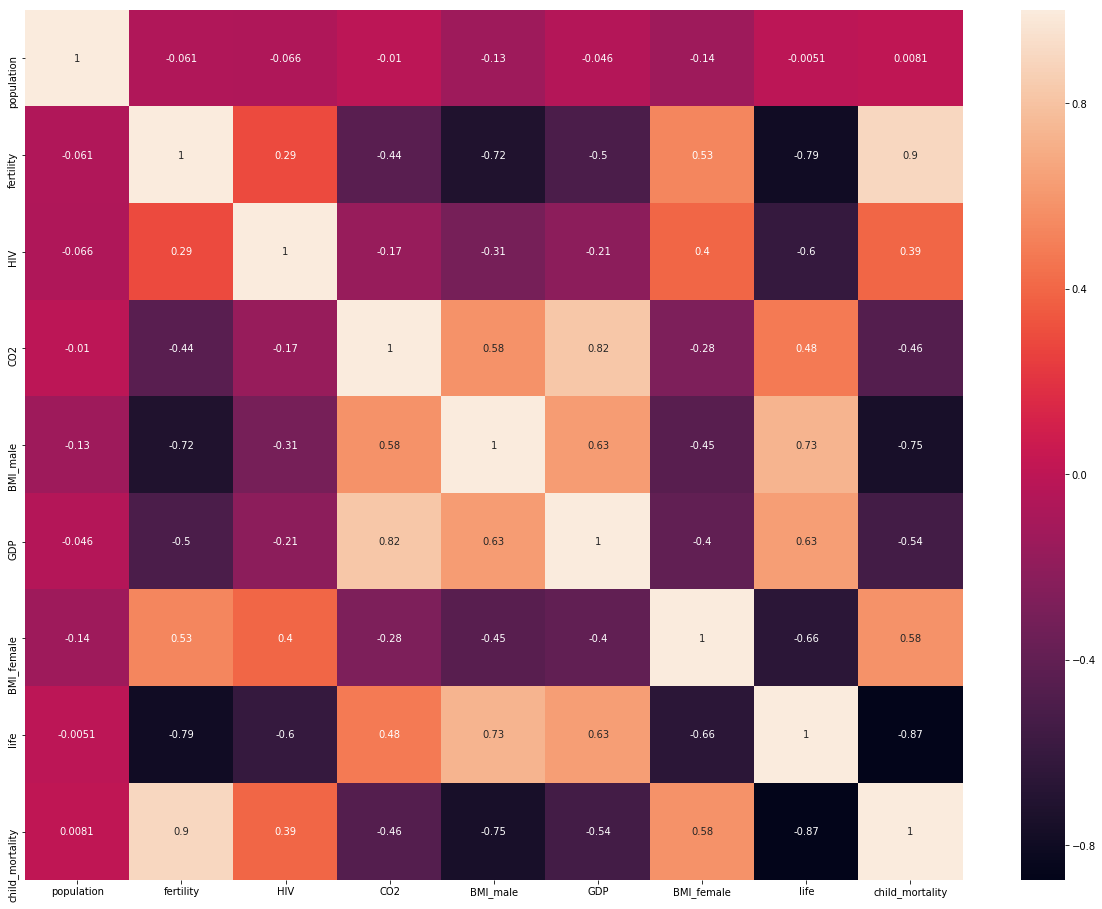

All features and their correlation with life
population        -0.005051
fertility         -0.786921
HIV               -0.604749
CO2                0.476666
BMI_male           0.731559
GDP                0.628999
BMI_female        -0.658718
life               1.000000
child_mortality   -0.874106
Name: life, dtype: float64
First set of features which have a high correlation to life either above 0.6 or below -0.6
['fertility', 'HIV', 'BMI_male', 'GDP', 'BMI_female', 'life', 'child_mortality']
Checking for correlation between the features selected above we get to keep only the below as these are the only ones which have a high correlation to life and are independent of each other as well
['child_mortality', 'HIV', 'GDP', 'BMI_female']


In [5]:
print ("Life is our output and everything else is the X")
time.sleep(1)
print ("Printing correlation table")
plt.figure(figsize=(21,16))
sns.heatmap(df.corr(), annot=True)
plt.show()
print ("All features and their correlation with life")
print (df.corr()["life"])
print ("First set of features which have a high correlation to life either above 0.6 or below -0.6")
time.sleep(2)
f = df.corr()[(df.corr()["life"]>0.6)|(df.corr()["life"]<-0.6)].index.tolist()
print (f)
df.corr()
print ("Checking for correlation between the features selected above we get to keep only the below"
      +" as these are the only ones which have a high correlation to life"
      +" and are independent of each other as well")
time.sleep(5)
f2 = ["child_mortality", "HIV", "GDP", "BMI_female"]
print (f2)

In [6]:
df

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
0,34811059,2.73,0.10,3.328945,24.59620,12314,129.9049,75.3,29.5
1,19842251,6.43,2.00,1.474353,22.25083,7103,130.1247,58.3,192.0
2,40381860,2.24,0.50,4.785170,27.50170,14646,118.8915,75.5,15.4
3,2975029,1.40,0.10,1.804106,25.35542,7383,132.8108,72.5,20.0
4,21370348,1.96,0.10,18.016313,27.56373,41312,117.3755,81.5,5.2
5,8331465,1.41,0.30,8.183160,26.46741,43952,124.1394,80.4,4.6
6,8868713,1.99,0.10,5.109538,25.65117,14365,128.6024,70.6,43.3
7,348587,1.89,3.10,3.131921,27.24594,24373,124.3862,72.2,14.5
8,148252473,2.38,0.06,0.319161,20.39742,2265,125.0307,68.4,55.9
9,277315,1.83,1.30,6.008279,26.38439,16075,126.3940,75.3,15.4
